# CA4

### Imports

In [2]:

import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.decomposition import PCA



from sklearn.metrics import confusion_matrix, f1_score, make_scorer




ModuleNotFoundError: No module named 'seaborn'

### Reading data

In [ ]:
raw_train = pd.read_csv('train.csv', index_col=0)
test_data = pd.read_csv('test.csv', index_col=0)



### Data exploration and visualisation

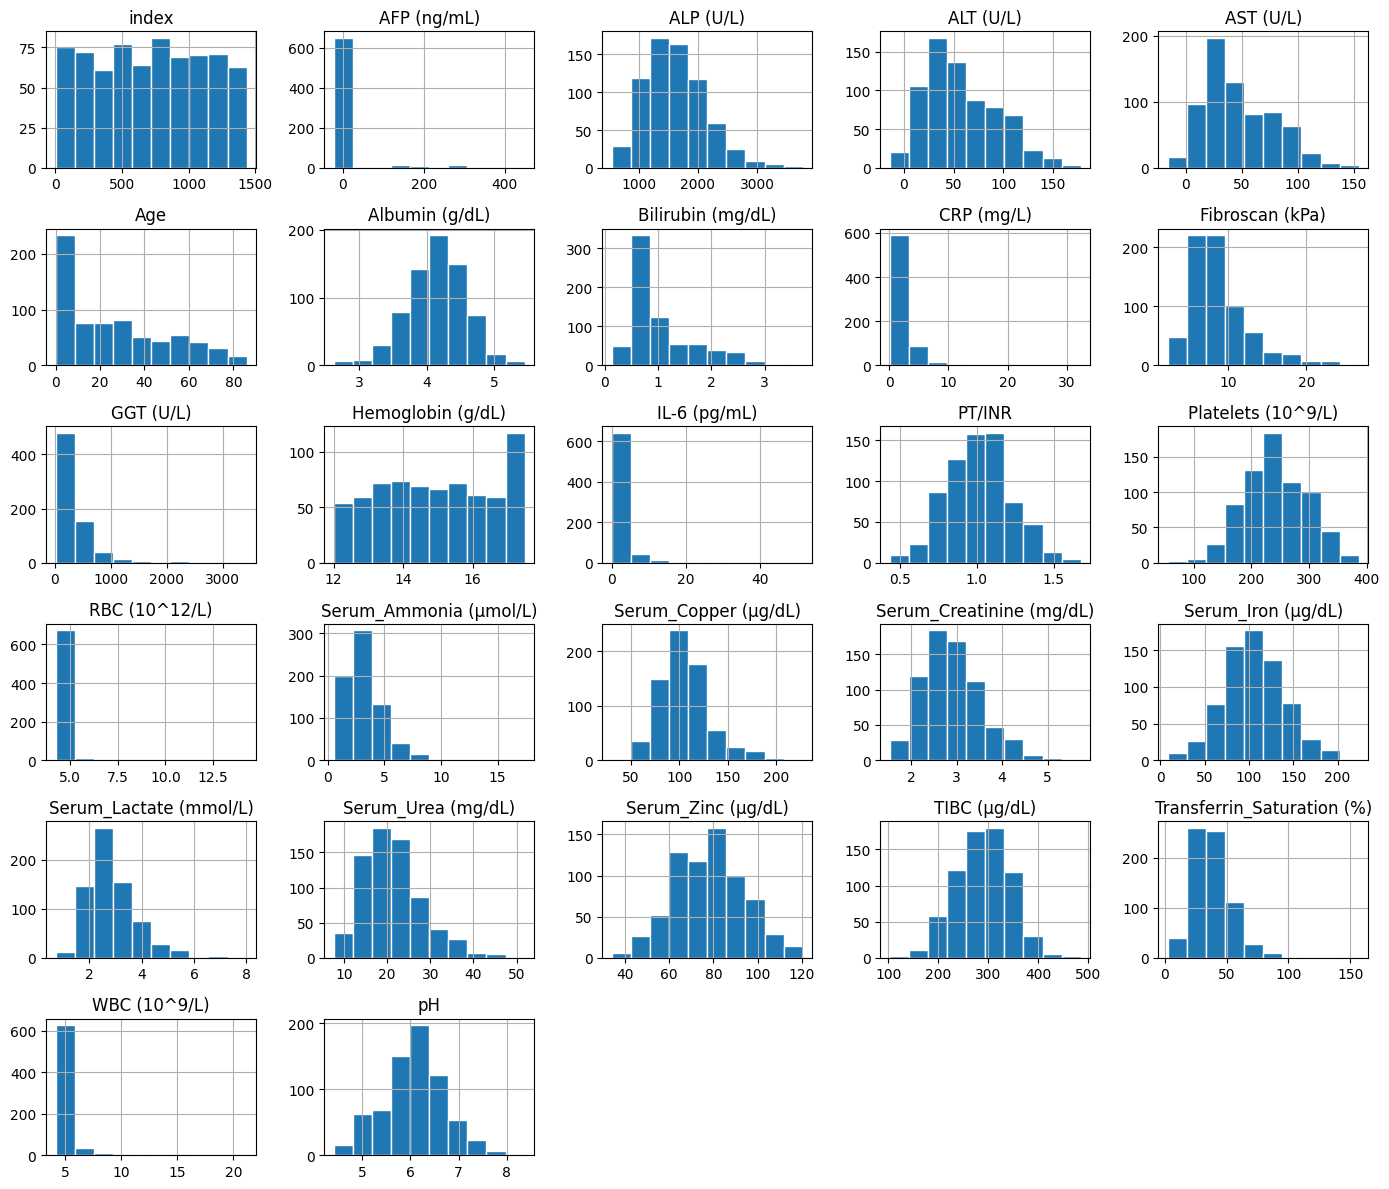

In [ ]:
# Histogram 
raw_train.hist(figsize=(14,12) , edgecolor="white") # edgecolor makes it look nicer 
plt.tight_layout()
plt.show()

In [ ]:
# Pairplot
#sns.pairplot(data=raw_train, hue = 'Diagnosis')
#plt.show()

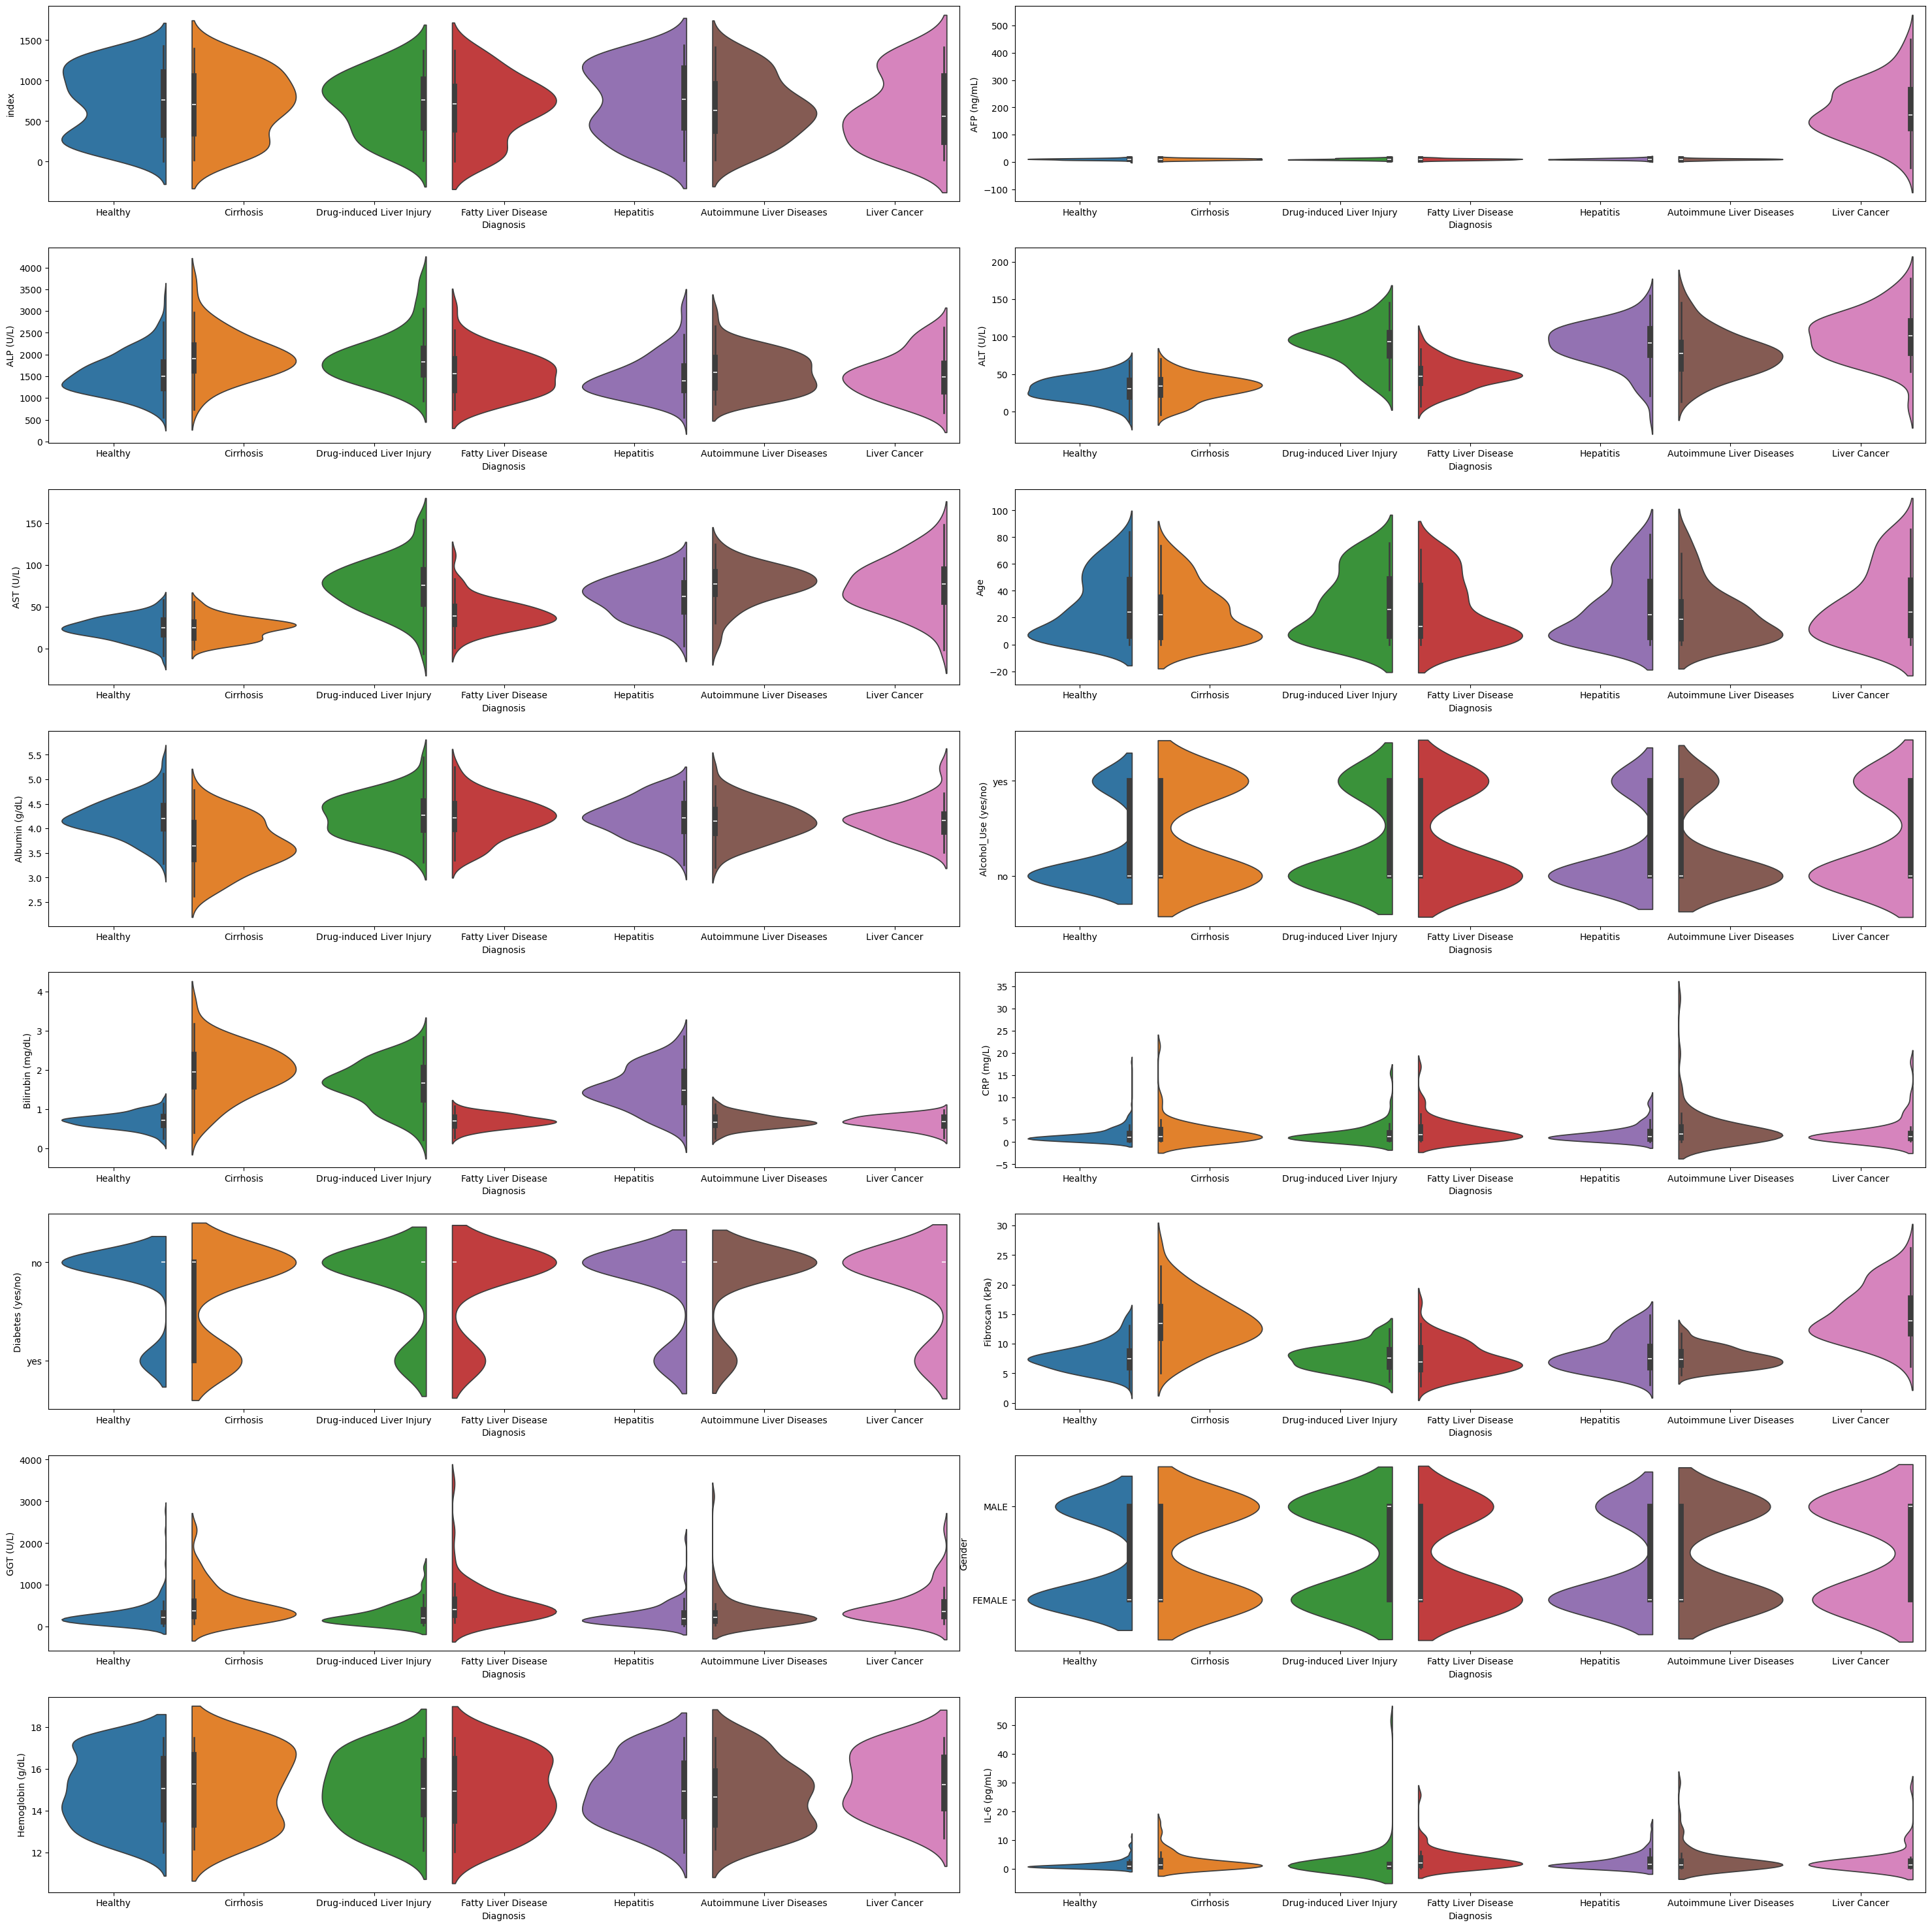

In [ ]:
# violin plot
fig_violin, ax_violin = plt.subplots(nrows=8, ncols=2, figsize=(30,30))
plt.tight_layout(pad=3.0)

i = 0
for row in range(8):
    for col in range(2):
        sns.violinplot(ax=ax_violin[row, col], data=raw_train, x='Diagnosis', y=raw_train.columns[i], 
                       hue='Diagnosis', split=True) # the split makes it easier to see the differenvce for edible 1 or 0
        i += 1
        
plt.show()

In [ ]:
# check for missing values
print(raw_train.isnull().sum())
raw_train.shape

index                         0
AFP (ng/mL)                   0
ALP (U/L)                     0
ALT (U/L)                     0
AST (U/L)                     0
Age                           0
Albumin (g/dL)                0
Alcohol_Use (yes/no)          0
Bilirubin (mg/dL)             0
CRP (mg/L)                    0
Diabetes (yes/no)             0
Fibroscan (kPa)               0
GGT (U/L)                     0
Gender                        0
Hemoglobin (g/dL)             0
IL-6 (pg/mL)                  0
Obesity (yes/no)              0
PT/INR                        0
Platelets (10^9/L)            0
RBC (10^12/L)                 0
Serum_Ammonia (μmol/L)        0
Serum_Copper (μg/dL)          0
Serum_Creatinine (mg/dL)      0
Serum_Iron (μg/dL)            0
Serum_Lactate (mmol/L)        0
Serum_Urea (mg/dL)            0
Serum_Zinc (μg/dL)            0
TIBC (μg/dL)                  0
Transferrin_Saturation (%)    0
WBC (10^9/L)                  0
pH                            0
Diagnosi

(703, 32)

In [ ]:
#raw_train.head()
print(raw_train['Diagnosis'].value_counts())

Diagnosis
Healthy                      250
Hepatitis                    113
Autoimmune Liver Diseases     79
Drug-induced Liver Injury     73
Cirrhosis                     71
Fatty Liver Disease           62
Liver Cancer                  55
Name: count, dtype: int64


### Data cleaning

In [ ]:
print(test_data.isnull().sum())
raw_train.shape

index                         0
AFP (ng/mL)                   0
ALP (U/L)                     0
ALT (U/L)                     0
AST (U/L)                     0
Age                           0
Albumin (g/dL)                0
Alcohol_Use (yes/no)          0
Bilirubin (mg/dL)             0
CRP (mg/L)                    0
Diabetes (yes/no)             0
Fibroscan (kPa)               0
GGT (U/L)                     0
Gender                        0
Hemoglobin (g/dL)             0
IL-6 (pg/mL)                  0
Obesity (yes/no)              0
PT/INR                        0
Platelets (10^9/L)            0
RBC (10^12/L)                 0
Serum_Ammonia (μmol/L)        0
Serum_Copper (μg/dL)          0
Serum_Creatinine (mg/dL)      0
Serum_Iron (μg/dL)            0
Serum_Lactate (mmol/L)        0
Serum_Urea (mg/dL)            0
Serum_Zinc (μg/dL)            0
TIBC (μg/dL)                  0
Transferrin_Saturation (%)    0
WBC (10^9/L)                  0
pH                            0
dtype: i

(703, 32)

In [ ]:
# convert yes and no to 1 and 0
df = raw_train
columns_to_encode = ['Alcohol_Use (yes/no)','Diabetes (yes/no)', 'Gender','Obesity (yes/no)', 'Diagnosis']
le = LabelEncoder()
for col in columns_to_encode:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
df

,index,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Alcohol_Use (yes/no),Bilirubin (mg/dL),CRP (mg/L),...,Serum_Creatinine (mg/dL),Serum_Iron (μg/dL),Serum_Lactate (mmol/L),Serum_Urea (mg/dL),Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH,Diagnosis
0,1124,13.571425,1653.138489,40.405592,45.598427,4,4.477126,1,0.541997,1.002121,...,2.569954,97.242495,2.923385,26.696110,96.124260,315.439318,30.827639,4.180007,6.163600,4
1,1188,13.649342,1940.518305,21.336986,34.064095,55,3.190724,1,1.199063,0.582746,...,3.024642,128.597676,2.719966,23.021218,50.554650,268.492437,47.896200,4.590995,5.244266,1
2,530,10.898943,1557.369920,29.665496,16.044488,30,4.506351,0,0.740952,1.670375,...,2.219844,98.026938,3.267757,20.123808,82.900681,312.107620,31.408057,4.524580,5.769592,4
3,686,13.872275,1273.840525,142.418649,64.204257,0,3.665655,1,1.939879,1.220646,...,1.704282,63.105133,1.937625,36.436855,72.360010,182.506010,34.577016,4.234483,5.982228,2
4,296,10.102457,1461.622515,22.437303,23.940205,59,4.005109,0,0.769535,0.139863,...,2.656926,89.966713,1.979801,20.036074,63.216136,212.261519,42.384844,4.306892,4.837404,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,664,13.086307,1663.149063,94.844911,81.525503,82,3.893254,1,1.514709,4.102990,...,2.510571,71.561815,3.255364,13.806666,74.751383,331.761651,21.570249,4.239866,6.525677,5
699,1227,12.425079,1580.772607,19.152473,29.765881,8,4.434494,1,2.497997,3.827726,...,3.267194,139.135093,3.741368,24.133150,51.577230,266.947184,52.120832,4.374619,6.071335,1
700,1019,12.887508,1164.383286,116.825787,71.610295,14,4.002324,0,1.760204,2.456043,...,3.056218,141.278410,2.945887,13.363649,95.869655,260.085180,54.320054,4.369082,5.059313,5
701,767,8.947665,1178.449705,7.818343,46.739457,2,3.866326,0,0.552524,4.907847,...,2.322946,112.506385,2.180009,15.892570,72.641767,344.926350,32.617510,4.249171,6.546267,4


In [ ]:
print(raw_train['Diagnosis'].value_counts())

Diagnosis
4    250
5    113
0     79
2     73
1     71
3     62
6     55
Name: count, dtype: int64


In [ ]:
# Using Z-scores to filter out the outliers. Z-score < |3|
print(f'Shape of dataset before removing outliers{df.shape}')
z_scores = stats.zscore(df) # calculates z score
abs_z_scores = np.abs(z_scores)
not_outliers = (abs_z_scores < 3).all(axis=1)
cleaned = df[not_outliers]
print(f'Shape of dataset after removing outliers {cleaned.shape}')



Shape of dataset before removing outliers(703, 32)
Shape of dataset after removing outliers (548, 32)


In [ ]:
Diagnosis = cleaned['Diagnosis']
# Omvendt mapping dictionary
reverse_label_mapping = {
    0: 'Autoimmune Liver Diseases',
    1: 'Chirrosis',
    2: 'Drug-induced Liver Injury',
    3: 'Fatty Liver Disease',
    4: 'Healthy',
    5: 'Hepatitis',
    6: 'Liver Cancer'
}

# Konverterer de kodede diagnosene tilbake til sykdommer ved hjelp av omvendt mapping dictionary
cleaned['Diagnosis'] = [reverse_label_mapping[label] for label in Diagnosis]


cleaned.head()

/var/folders/qf/9lcflp0s1nq8l85_tw03dz180000gp/T/ipykernel_50288/186666655.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['Diagnosis'] = [reverse_label_mapping[label] for label in Diagnosis]


,index,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Alcohol_Use (yes/no),Bilirubin (mg/dL),CRP (mg/L),...,Serum_Creatinine (mg/dL),Serum_Iron (μg/dL),Serum_Lactate (mmol/L),Serum_Urea (mg/dL),Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH,Diagnosis
0,1124,13.571425,1653.138489,40.405592,45.598427,4,4.477126,1,0.541997,1.002121,...,2.569954,97.242495,2.923385,26.696110,96.124260,315.439318,30.827639,4.180007,6.163600,Healthy
1,1188,13.649342,1940.518305,21.336986,34.064095,55,3.190724,1,1.199063,0.582746,...,3.024642,128.597676,2.719966,23.021218,50.554650,268.492437,47.896200,4.590995,5.244266,Chirrosis
2,530,10.898943,1557.369920,29.665496,16.044488,30,4.506351,0,0.740952,1.670375,...,2.219844,98.026938,3.267757,20.123808,82.900681,312.107620,31.408057,4.524580,5.769592,Healthy
3,686,13.872275,1273.840525,142.418649,64.204257,0,3.665655,1,1.939879,1.220646,...,1.704282,63.105133,1.937625,36.436855,72.360010,182.506010,34.577016,4.234483,5.982228,Drug-induced Liver Injury
4,296,10.102457,1461.622515,22.437303,23.940205,59,4.005109,0,0.769535,0.139863,...,2.656926,89.966713,1.979801,20.036074,63.216136,212.261519,42.384844,4.306892,4.837404,Healthy


In [ ]:
cleaned

,index,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Alcohol_Use (yes/no),Bilirubin (mg/dL),CRP (mg/L),...,Serum_Creatinine (mg/dL),Serum_Iron (μg/dL),Serum_Lactate (mmol/L),Serum_Urea (mg/dL),Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH,Diagnosis
0,1124,13.571425,1653.138489,40.405592,45.598427,4,4.477126,1,0.541997,1.002121,...,2.569954,97.242495,2.923385,26.696110,96.124260,315.439318,30.827639,4.180007,6.163600,Healthy
1,1188,13.649342,1940.518305,21.336986,34.064095,55,3.190724,1,1.199063,0.582746,...,3.024642,128.597676,2.719966,23.021218,50.554650,268.492437,47.896200,4.590995,5.244266,Chirrosis
2,530,10.898943,1557.369920,29.665496,16.044488,30,4.506351,0,0.740952,1.670375,...,2.219844,98.026938,3.267757,20.123808,82.900681,312.107620,31.408057,4.524580,5.769592,Healthy
3,686,13.872275,1273.840525,142.418649,64.204257,0,3.665655,1,1.939879,1.220646,...,1.704282,63.105133,1.937625,36.436855,72.360010,182.506010,34.577016,4.234483,5.982228,Drug-induced Liver Injury
4,296,10.102457,1461.622515,22.437303,23.940205,59,4.005109,0,0.769535,0.139863,...,2.656926,89.966713,1.979801,20.036074,63.216136,212.261519,42.384844,4.306892,4.837404,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,693,4.759313,1140.678309,44.894490,36.056425,7,4.287121,0,0.596449,2.030087,...,3.038189,115.244443,2.130219,18.137030,80.474510,284.866254,40.455632,4.651054,6.550715,Fatty Liver Disease
697,393,8.646523,1322.021653,9.043227,17.413209,52,3.592262,0,0.907676,0.573468,...,1.887340,156.943510,1.132912,9.105395,90.992975,320.117257,49.026882,4.691780,5.043476,Healthy
698,664,13.086307,1663.149063,94.844911,81.525503,82,3.893254,1,1.514709,4.102990,...,2.510571,71.561815,3.255364,13.806666,74.751383,331.761651,21.570249,4.239866,6.525677,Hepatitis
701,767,8.947665,1178.449705,7.818343,46.739457,2,3.866326,0,0.552524,4.907847,...,2.322946,112.506385,2.180009,15.892570,72.641767,344.926350,32.617510,4.249171,6.546267,Healthy


### Data preprocessing and visualisation

In [ ]:
X = cleaned.drop(["Diagnosis"], axis=1) # contains all columns except traget colum Edible 
y = cleaned["Diagnosis"] # only contains the traget colum Edible



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (328, 31)
X_test:  (220, 31)
y_train:  (328,)
y_test:  (220,)


In [ ]:
sc = StandardScaler()
sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

### Modelling

#### Pipeline with kernel

In [ ]:
# Create Pipeline
pipeline_kernel = Pipeline([
    ('scaler', StandardScaler()),
    ('reduce_dim', PCA()),  # or any other dimension reduction method
    ('clf', SVC(kernel='rbf', probability=True))  # Classifier with kernel
])

# Define Hyperparameters
param_grid_kernel = {
    'reduce_dim__n_components': [2, 5, 10],
    'clf__C': [0.1, 1, 10],
    'clf__gamma': [0.1, 1, 10]
}

# Grid Search for Hyperparameters
grid_search_kernel = GridSearchCV(pipeline_kernel, param_grid_kernel, cv=5, scoring='roc_auc')
grid_search_kernel.fit(X_train, y_train)

# Hyperparameter Tuning
best_estimator = grid_search_kernel.best_estimator_

# Evaluate with F1-score
cv_scores = cross_val_score(best_estimator, X_train, y_train, cv=10, scoring='f1_macro')
print("Cross-Validation F1-score:", cv_scores.mean())

#Confusion Matrix
y_pred = best_estimator.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


df_submission = pd.DataFrame({'Diagnosis': y_pred})
df_submission.reset_index(level=0, inplace=True)

df_submission.columns = ['index', 'Diagnosis']
df_submission.to_csv('submission_kernel.csv', index=False)


/Users/73rabann/Desktop/DAT200/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/73rabann/Desktop/DAT200/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/73rabann/Desktop/DAT200/.venv/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/73rabann/Desktop/DAT200/.venv/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, 

Cross-Validation F1-score: 0.25256112401503794
Confusion Matrix:
 [[ 0  0  0  0 13  7  0]
 [ 0  8  0  0  7  0  0]
 [ 0  0  0  0  5 16  0]
 [ 0  0  0  0 24  1  0]
 [ 0  0  0  0 84  0  0]
 [ 0  0  0  0 12 34  0]
 [ 0  3  0  0  2  4  0]]


### pipline with regularization

In [ ]:
# Create Pipeline
pipeline_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('reduce_dim', PCA()),  # or any other dimension reduction method
    ('clf', LogisticRegression())  # Classifier with regularization
])

# Define Hyperparameters
param_grid_reg = {
    'reduce_dim__n_components': [2, 5, 10],
    'clf__C': [0.1, 1, 10]
}

# Grid Search for Hyperparameters
grid_search_reg = GridSearchCV(pipeline_reg, param_grid_reg, cv=5, scoring='roc_auc')
grid_search_reg.fit(X_train, y_train)

# Hyperparameter Tuning
best_estimator = grid_search_reg.best_estimator_

# Evaluate with F1-score
cv_scores = cross_val_score(best_estimator, X_train, y_train, cv=10, scoring='f1_macro')
print("Cross-Validation F1-score:", cv_scores.mean())

#Confusion Matrix
y_pred = best_estimator.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


df_submission = pd.DataFrame({'Diagnosis': y_pred})
df_submission.reset_index(level=0, inplace=True)

df_submission.columns = ['index', 'Diagnosis']
df_submission.to_csv('submission1.csv', index=False)

/Users/73rabann/Desktop/DAT200/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:988: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/73rabann/Desktop/DAT200/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 977, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/73rabann/Desktop/DAT200/.venv/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/73rabann/Desktop/DAT200/.venv/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, 

Cross-Validation F1-score: 0.3811935585322682
Confusion Matrix:
 [[ 7  0  0  0  8  5  0]
 [ 0 10  0  0  5  0  0]
 [ 7  0  0  0  2 12  0]
 [ 1  0  0  0 23  1  0]
 [ 1  0  0  0 83  0  0]
 [ 1  0  0  0  9 36  0]
 [ 0  3  0  0  0  4  2]]


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('reduce_dim', PCA(n_components=302)), 
    ('clf', SVC())  
])

# Define Hyperparameters
parameters = {
    'reduce_dim__n_components': [2, 5, 10],
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf']
}

# Cross-Validation
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Hyperparameter Tuning
best_estimator = grid_search.best_estimator_

# Evaluate with F1-score
cv_scores = cross_val_score(best_estimator, X_train, y_train, cv=5, scoring='f1_macro')
print("Cross-Validation F1-score:", cv_scores.mean())

#Confusion Matrix
y_pred = best_estimator.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


df_submission = pd.DataFrame({'Diagnosis': y_pred})
df_submission.reset_index(level=0, inplace=True)

df_submission.columns = ['index', 'Diagnosis']
df_submission.to_csv('submission2.csv', index=False)

NameError: name 'Pipeline' is not defined

### Final evaluation

### Kaggle submission